In [28]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from tqdm import tqdm

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ews_analysis import hopf_helper as hh
from ews_analysis.saddlenode_ews import dSdt as sd_model
from ews_analysis.pitchfork_helper import *
from ews_helper import get_ews, itoEulerMaruyama

from scipy.integrate import odeint, solve_ivp


In [29]:
def run_bif_sim(ode_model, time, r0, x0, epsilon, sigma_noise, a=1):
    
    results,derivatives = itoEulerMaruyama(
        model=ode_model,
        y0=[x0, r0],
        time=time,
        noise=[sigma_noise,0],args=(epsilon,a),save_derivative=True
    )
    return results,derivatives

def plot_bif_sim(fig, axs, time, results, derivatives):

    if not isinstance(axs, np.ndarray):
        axs = np.array([axs])
    
    axs[0].plot(time, results[:,0]) # , label='x')
    # axs[0].plot(time, derivatives[:,0]) # , label='x')
    # axs[0].plot(time, results[:,1]) #, label='r')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('x')
    # make ax grey
    axs[0].set_facecolor(plt.cm.gray(.85))

    # plot t_star, where r(t) = 0 = r0 + epsilon*t 
    t_star = time[np.where(results[:,1] >= 0)[0][0]]
    # axs[0].axvline(t_star, c='r', ls='--') #label=f't*={t_star:.2f}'

    # ax.set_ylim(-20, 70)
    # axs[0].legend()
    axs[0].grid()
    # plt.show()
    return fig, axs, t_star

def run_bif_sim_and_plot(fig, axs, ode_model, time, r0, x0, epsilon, sigma_noise, a=1, ttl=''):

    # Run sim and get data
    results, derivatives = run_bif_sim(
        ode_model, time, r0, x0, epsilon, sigma_noise,a=a
    )

    # Plot
    fig, axs, t_star = plot_bif_sim(fig, axs, time, results, derivatives)

    # Set title
        
    tmp_dt = np.mean(time[1:] - time[:-1])
    ttl = ttl + f"time=[{time[0]:.2f},{time[-1]:.2f}], dt={tmp_dt:.2f}, r0={r0},  "
    ttl = ttl + f"x0={x0}, epsilon={epsilon}, sigma_noise={sigma_noise}, a={a}"
    fig.suptitle(ttl, fontsize=10)
    return fig, axs, t_star, results, derivatives

def plot_roots_of_pitchfork(ax, time, a, results):
    """Roots of rx-ax^3 are 0 and +-sqrt(r/a), Plot them"""
    t_zero = np.where(results[:,1] >= 0)[0][0]
    roots_abs = np.zeros_like(results[:, 1])
    roots_abs[t_zero:] = (np.sqrt(results[t_zero:, 1] / a))
    # roots_abs[t_zero:] = a/results[t_zero:, 1] 
    ax.plot(time, roots_abs, color='black', label='roots of rx-ax^3')
    ax.plot(time, -1*roots_abs, color='black')
    ax.plot(time, 0*roots_abs, color='black', ls='--')
    ax.legend()
    return ax

# def plot_roots_of_sdlnode(ax, t_star, results):
#     """Roots of r+ax^2-x^3"""
#     t_zero = np.where(results[:,1] >= 0)[0][0]
#     roots_abs = np.zeros_like(results[:, 1])
#     roots_abs[t_zero:] = np.sqrt(results[t_zero:, 1] / a)
#     ax.plot(time, roots_abs, color='black')
#     ax.plot(time, -1*roots_abs, color='black')
#     ax.plot(time, 0*roots_abs, color='black', ls='--')
#     return ax



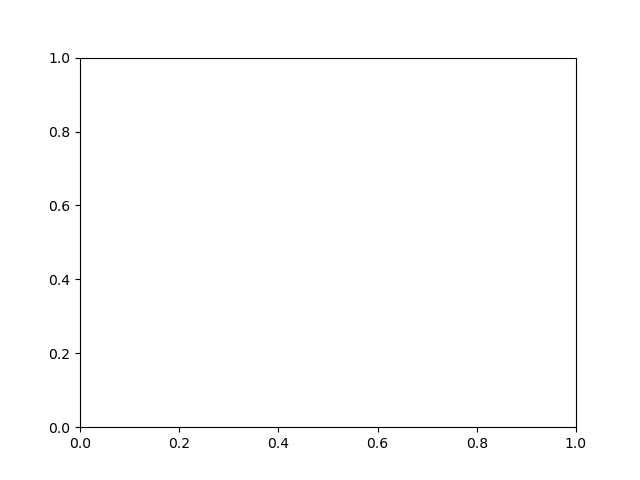

In [30]:
# Single run of run_bif_sim_and_plot

fig, axs = plt.subplots(1,1)
time = np.arange(0, 4, 0.1)
r0 = -1
x0 = 0.1
a = 25
epsilon = 1.5
sigma = 0.5

ttl = r"Pitchfork: $\dot{x}$ = rx - $ax^3$,    $\dot{r}$ = $\epsilon$" + "\n" 

# fig, axs, t_star, results, derivatives = run_bif_sim_and_plot(
#     fig, axs, dSdt, time, r0, x0, epsilon, sigma_noise=sigma, a=a, ttl=ttl
# )

In [31]:
# fig, axs = plt.subplots(1,1)
time = np.arange(0, 4, 0.1)
r0 = -1
x0 = 0.1
a = 25
epsilon = 1.5
sigma = 0.5

for i in range(3):
    fig, axs, t_star, results, derivatives = run_bif_sim_and_plot(
    fig, axs, dSdt, time, r0, x0, epsilon, sigma_noise=sigma, a=a, ttl=ttl
 )

100%|██████████| 39/39 [00:00<00:00, 78984.96it/s]


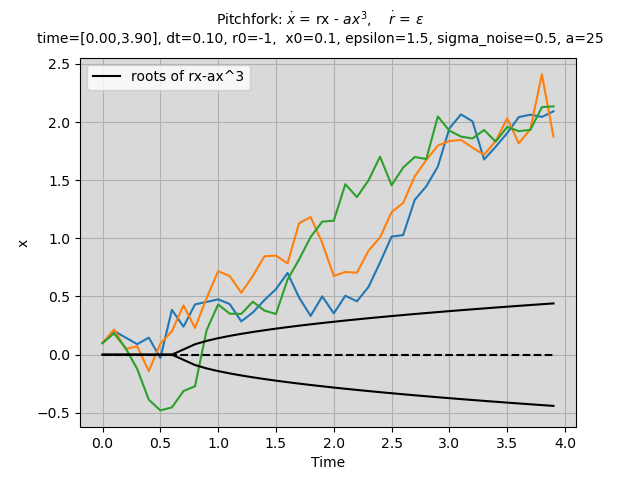

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2.4000000953674316, 'type': 'set_device_pixel_ratio'}


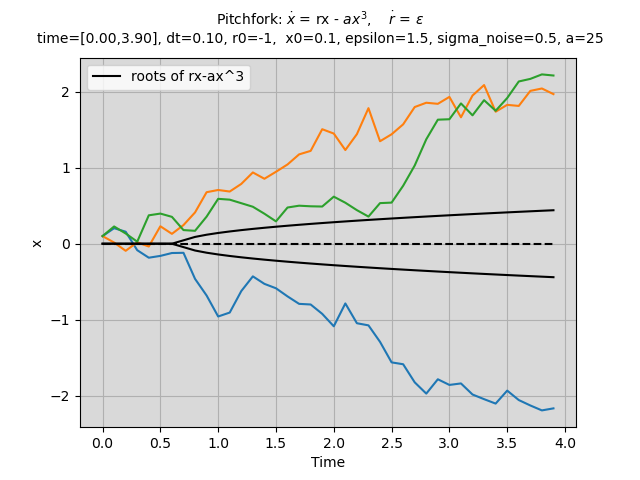

In [32]:
plot_roots_of_pitchfork(axs[0], time, a, results)
plt.show()

100%|██████████| 8999/8999 [00:00<00:00, 115806.73it/s]


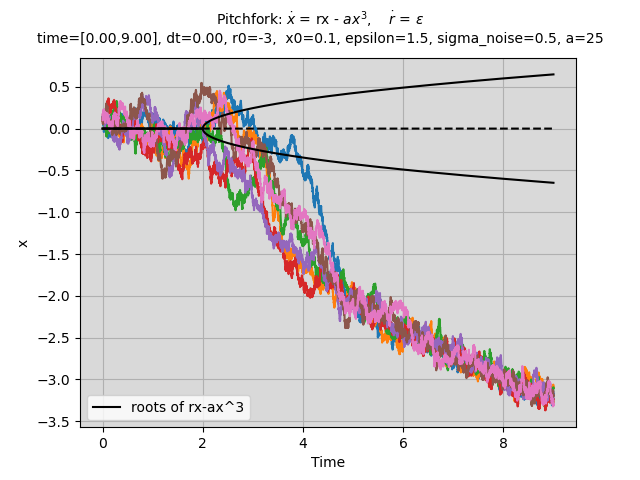

In [33]:
fig1, axs1 = plt.subplots(1,1)
time = np.arange(0, 9, 0.001)
r0 = -3
x0 = 0.1
a = 25
epsilon = 1.5
sigma = 0.5
ttl = r"Pitchfork: $\dot{x}$ = rx - $ax^3$,    $\dot{r}$ = $\epsilon$" + "\n"

for i in range(7):
    fig1, axs1, t_star, results, derivatives = run_bif_sim_and_plot(
    fig1, axs1, dSdt, time, r0, x0, epsilon, sigma_noise=sigma, a=a, ttl=ttl
)

plot_roots_of_pitchfork(axs1[0], time, a, results)
plt.show()

100%|██████████| 8999/8999 [00:00<00:00, 106249.33it/s]


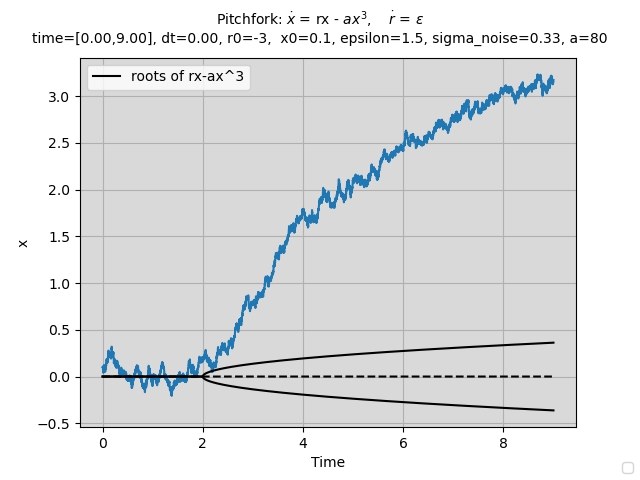

In [34]:
fig2, axs2 = plt.subplots(1,1)
time = np.arange(0, 9, 0.001)
r0 = -3
x0 = 0.1
a = 80
epsilon = 1.5
sigma = 0.33

for i in range(1):
    fig2, axs2, t_star, results, derivatives = run_bif_sim_and_plot(
    fig2, axs2, dSdt, time, r0, x0, epsilon, sigma_noise=sigma, a=a, ttl=ttl
)

plot_roots_of_pitchfork(axs2[0], time, a, results)
fig2.legend([],['+-sqrt(r/a)'], loc='lower right')
plt.show()

# np.savez('tmp_figs/pf_bif_sim.npz', time=time, results=results, derivatives=derivatives)

In [35]:
# Vars definetions

time = np.arange(-1, 1, 0.00001)
r0 = -1
x0 = 0.1
a = 25
epsilon = 1.05

r_of_t = r0 + (time * epsilon)

np.where(r_of_t >= 0)[0]
# r_of_t
t_star = time[np.where(r_of_t >= 0)[0][0]]
dt = (time[1:] - np.roll(time,1)[1:]).mean()



The simplest version of a (super-critical) pitchfork bifurcation looks like this:
$$ \quad \frac{dx}{dt}= rx - ax^3 $$
$$ \quad \frac{dr}{dt}= \epsilon $$
$r$ is the slow changing variable. As long as $r<0$ the only solution is $x=0$. Once y crosses the threshold $r_{th}=0$, the solution $x=0$ becomes unstable, and two new stable solutions appear at $x=\pm \sqrt{r}$.

In [36]:
win_size = ews_win_size = 11001
offset = ews_offset = 3001

# block_idxs, noisy_ar1s, noisy_decays, noisy_vars = get_ews(
#     time, results[:,0], win_size=win_size, offset=offset
# )

# fig, axs = plt.subplots(2,1)

# # Plot AR1s
# axs[0].plot(time[block_idxs[:len(noisy_ar1s)]], noisy_ar1s, label=f'With Noise')
# axs[0].axvline(
#     t_star, color='k', linestyle='--', 
#     alpha=0.5, label='x=0'
# )

# # Plot Decays
# axs[1].plot(time[block_idxs[:len(noisy_decays)]], noisy_decays, label=f'With Noise')
# axs[1].axvline(
#     t_star, color='k', linestyle='--', 
#     alpha=0.5, label='x=0'
# )

100%|██████████| 65/65 [00:00<00:00, 5534.28it/s]


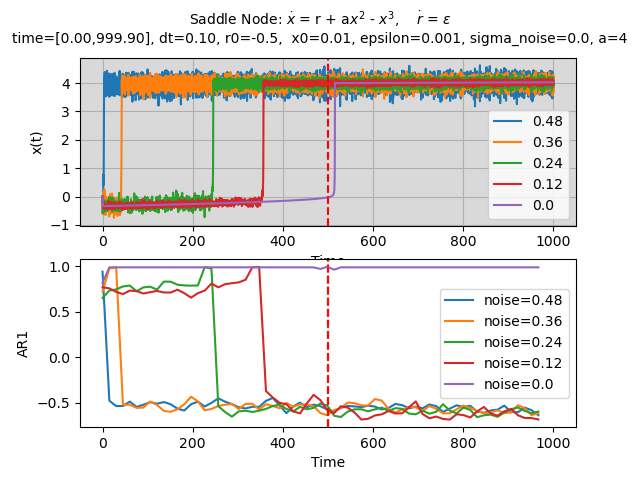

In [37]:
def plot_ar1s(ax, time, results, noise):
    # ews_fig, ews_axs = plt.subplots(2,1)

    win_size = ews_win_size = 301
    offset = ews_offset = win_size//2 + 1    
    lag = 1
            
    block_idxs_sd, ar1s_sd, decays_sd, vars_sd = get_ews(
        time, results[:,0], win_size=win_size, offset=offset, lag=lag
    )

    # Plot AR1s
    ax.plot(time[block_idxs_sd[:len(ar1s_sd)]], ar1s_sd, label=f'noise={noise}')
    ax.axvline(
        t_star, color='r', linestyle='--', 
        alpha=0.5
    )
    ax.set_ylabel(f'AR{lag}')

    # ttl = r'Saddle-Node Bifurcation: $\dot{x}$ = r + a$x^2$ - $x^3$,    $\dot{r}$ = $\epsilon$'
    # ews_fig.suptitle(ttl, fontsize=16)
    ax.legend()

def sd_model(t, S, epsilon, a):
    x, y = S
    try:
        shaper = np.ones_like(y)
    except:
        try:
            shaper = np.ones(len(y))
        except:
            shaper = 1

    return [
        y + a*x**2 - x**3,
        epsilon * shaper
    ]


# fig_sd, axs_sd = plt.subplots(1,1)
fig_sd, axs_sd = plt.subplots(2,1)
axs_sd[0].sharex(axs_sd[1])
time = np.arange(0, 1000, 0.1)
r0 = -0.5
x0 = 0.01
a = 4 #
epsilon = 0.001
sigma = 0.04 #

ttl = r"Saddle Node: $\dot{x}$ = r + a$x^2$ - $x^3$,    $\dot{r}$ = $\epsilon$" + "\n"

tmp_lgd = []
for i in range(1,6):
    noise = sigma*3*(5-i)
    fig_sd, axs_sd, t_star, results, derivatives = run_bif_sim_and_plot(
    fig_sd, axs_sd, sd_model, time, r0, x0, epsilon, sigma_noise=noise, a=a, ttl=ttl
    )
    tmp_lgd.append(f'{noise}')
    plot_ar1s(axs_sd[1], time, results, noise)

axs_sd[0].legend(tmp_lgd, loc='lower right')
axs_sd[0].set_ylabel('x(t)')
axs_sd[0].axvline(t_star, c='r', ls='--')
axs_sd[1].set_xlabel('Time')
plt.show()

# np.savez('tmp_figs/sd_bif_sim.npz', time=time, results=results, derivatives=derivatives)

In [38]:
# np.savez('tmp_figs/sd_with_yuval_bif.npz', time=time, results=results, derivatives=derivatives)

In [39]:
# f = np.load('tmp_figs/sd_bif.npz')
# print(f['time'].shape)